# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [22,109,439]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  31276   1917     4469    9408              2381          4334
1   1406  16729    28986     673               836             3
2   2787   1698     2510      65               477            52

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


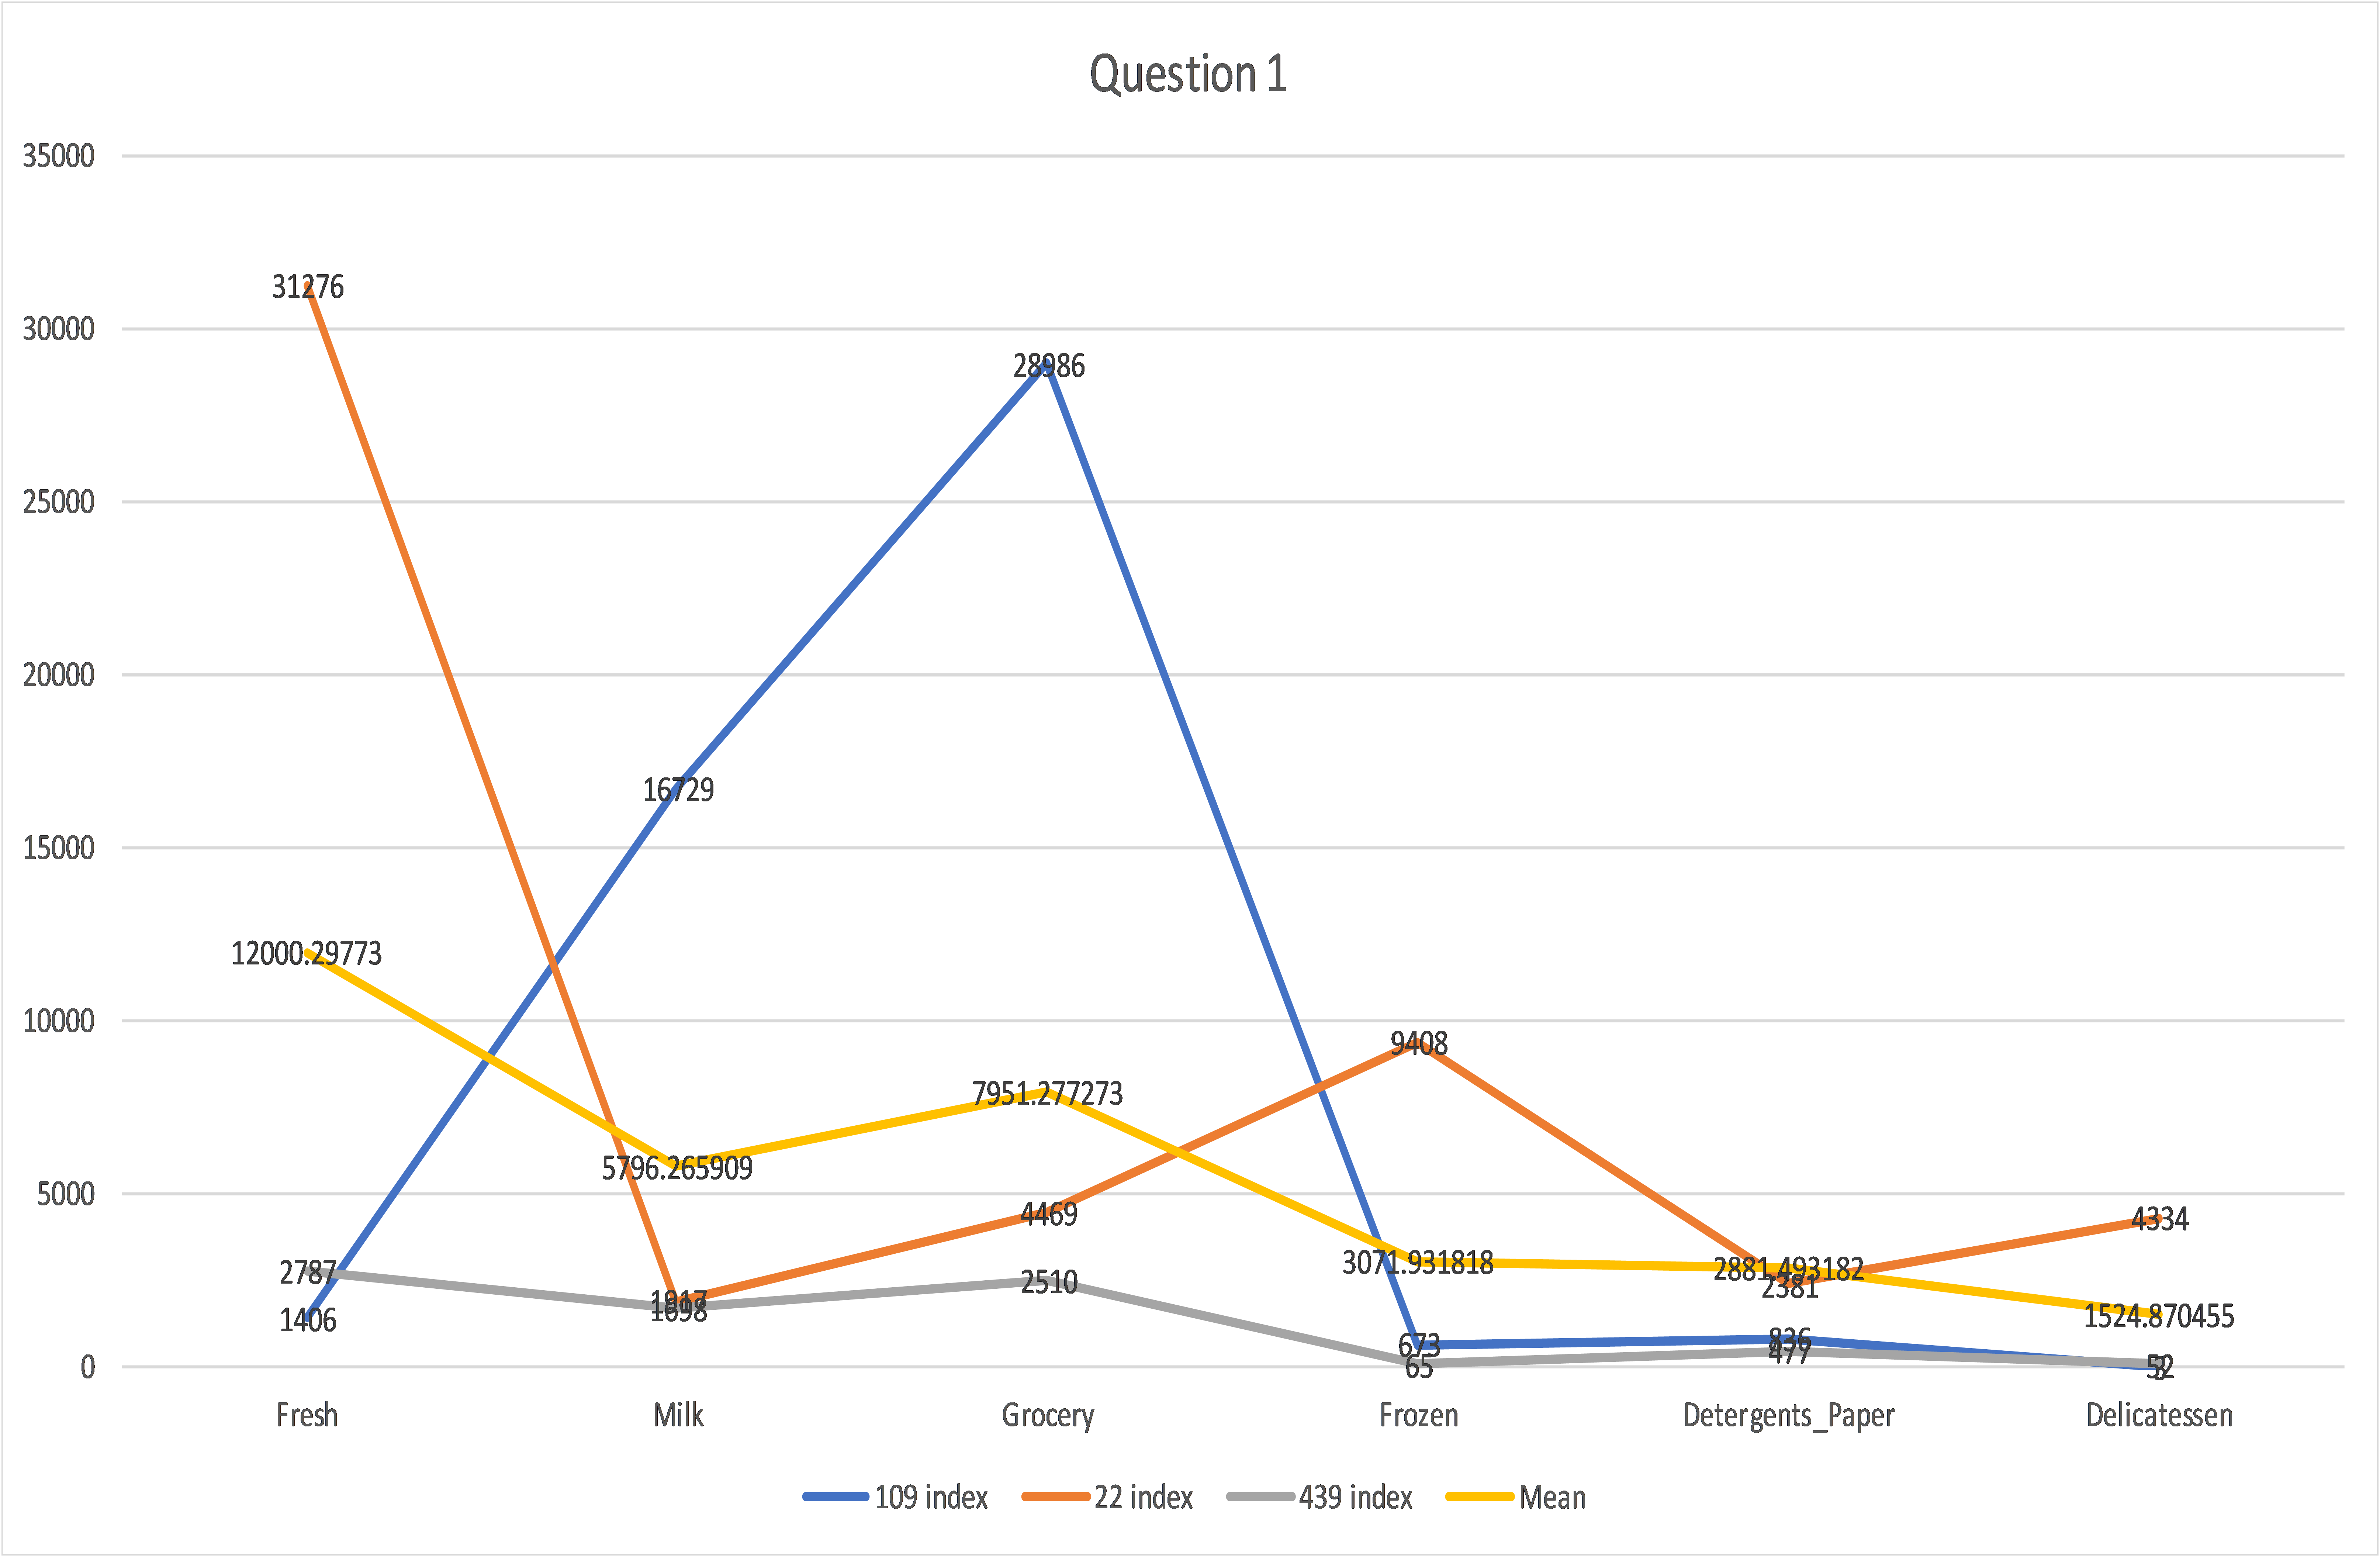

**Answer:**
Several tests were performed to find a significant sample variations. A simple graphic was generated to understand the samples and used to comapare the results with the mean values (Yellow curve).

**Sample 22: (Orange curve)**
Fresh, Frozen and Delicatessen categories have the higher spending amount, which indicates this costumer demands high quality, and selective products. The combination of these categories suggest a Fresh food Market. Detergents_Paper category is just below the average, might indicate to be cleaned constantly, make sense because markets demand it. Groceries and milk are below than mean, which indicates this costumer only need some products from these categories, probably few stands dedicated to these products?. Another insteresting point is that orange curve does not follow the same pattern than the mean curve. This probably indicates a non common customer. Fresh food markets are not so common than supermarkets, for example.

**Sample 109: (Blue curve)**
The categories Grocery and Milk are both much higher than mean spending amount. The rest of the categories are below than mean spending amount. frozen, Detergents_Paper and Delicatessen categories shows a similar pattern than the mean curve in that 3 categories. this sample could represent a large supermarket. It's Probably part of big Supermarket chain. Milk and groceries demands similar storage characteristics, which might indicate a big store for groceries and milk. No space for delicatessen, Frozen and Fresh. Detergents_Paper is very low, which migh indicate and efficient cleaning system.

**Sample 439: (Grey curve)**
The spending amount in Fresh, Milk and Grocery categories is similar. Then  in the other 3 categories is quite small. Also is necessary consider that each category performs below than the mean curve. An interesting point is this curve imitates the mean curve, but with small values.
These observations might point to a small local supermarket/convenience store, because the spending amount is much below than the average and the bigger amounts are Fresh, Milk and Grocery, which is something that people usually buys in local supermarkets. Frozen is 65, similar to delicatessen(52), which means the variety of this kind of products is limited. Also Frozen products requiered big machines. Detergent_Paper spending amount indicates the space is not big.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [4]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
cat = 'Delicatessen'
new_data = data.drop(cat,axis = 1)
target_fresh = data[cat]

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data, target_fresh, test_size=0.25, random_state=1)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=1)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
score

C:\Users\delab\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


-0.4291251956585451

In [5]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
arrCat = list(data)
print('categories to explore : ' + ', '.join(arrCat) + '\n')

from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

for cat in arrCat:
    new_data = data.drop(cat, axis=1)
    target_fresh = data[cat]
    #display(new_data)
   
    # TODO: Split the data into training and testing sets(0.25) using the given feature as the target
    # Set a random state.
    X_train, X_test, y_train, y_test = train_test_split(new_data, target_fresh, test_size=0.25, random_state=1)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state=1).fit(X_train, y_train)
    
    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    print (cat + ' - R^2: ' + str(score))

categories to explore : Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicatessen

Fresh - R^2: -0.9233736592978437
Milk - R^2: 0.5158499438066617
Grocery - R^2: 0.7957683115761958
Frozen - R^2: -0.6495743273336552
Detergents_Paper - R^2: 0.8152412791948308
Delicatessen - R^2: -0.4291251956585451


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**<br>
I change slightly the code in order to have a broad vision of the data. Initially I selected "Fresh" The score is negative: -0.92. The information in this category shows a meaningless relationship between other categories. Therfore It is not possible to predict "Fresh" based in the data of other categories.
<br>
In the other hand, Detergents_Paper, with  the highest R^2 score is highly correlated because is similar in behavior than other categories, and have a similar impact is redundant. It is possible to conclude it provide less relevant information because doesn't bring new information to the analysis.
<br><br>
References
<br>
1 The previous review, 
[2,](https://docs.rapidminer.com/latest/studio/operators/blending/attributes/selection/remove_correlated_attributes.html)
[3](https://www.knime.com/blog/seven-techniques-for-data-dimensionality-reduction)

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

C:\Users\delab\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


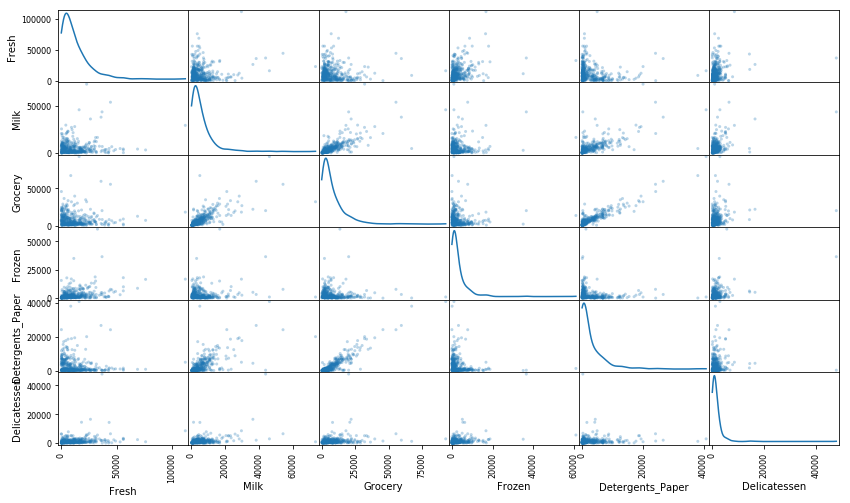

In [6]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

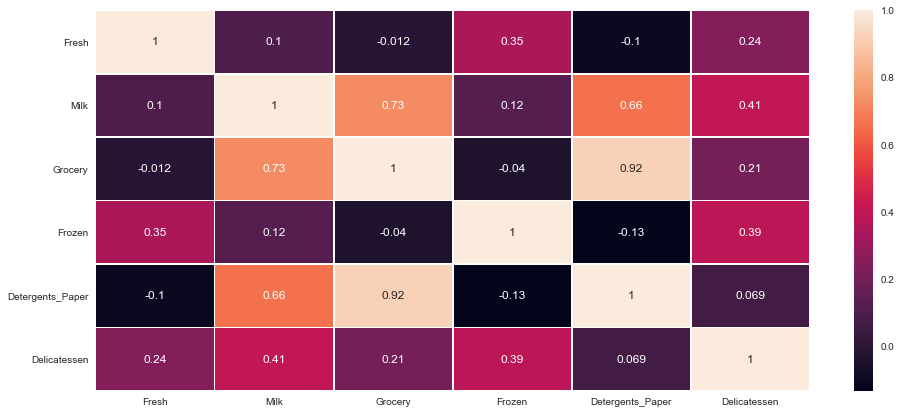

In [7]:
correlation = data.corr(method='pearson', min_periods=1)
import matplotlib.pyplot as plt

plt.figure(figsize = (16,7))

import seaborn as sns; sns.set()
sns.heatmap(correlation, annot=True, linewidths=.75)

**Answer:**<br>
The strongest correlations are between "Grocery" and "Detergents_Paper". Which is possible to identify in the heatmap above. Then "Milk" and "Grocery" and finally (above 0.50) "Milk" and "Detergents_Paper" correlations. Fresh and Frozen are the categories with less correlation with other categories.
<br><br>
The data is highly positive skewed (long tail to the right), which means median and mean are greated than mode. Also the data is not normally ditributed, because the peak it far away from the center. There is a high concentration of data points close to zero but also some points shows higher values. We could say that there are many outliers. 

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

C:\Users\delab\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


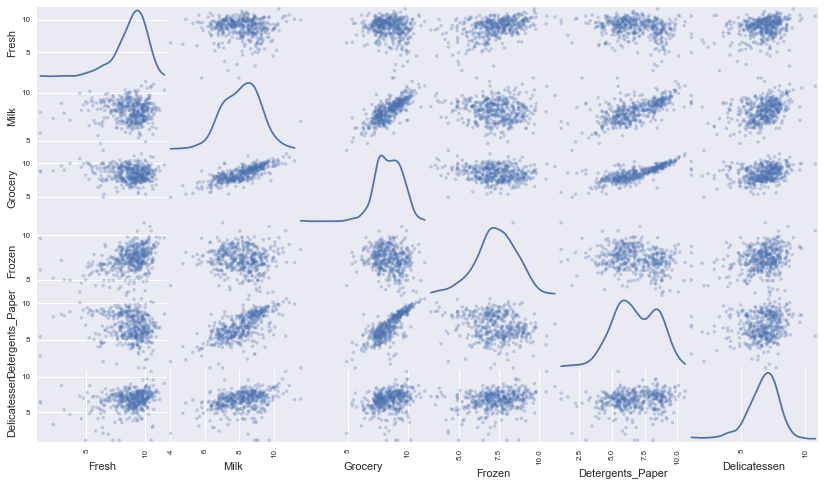

In [8]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [9]:
# Display the log-transformed sample data
display(log_samples)

Fresh      Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
0  10.350606  7.558517   8.404920  9.149316          7.775276      8.374246
1   7.248504  9.724899  10.274568  6.511745          6.728629      1.098612
2   7.932721  7.437206   7.828038  4.174387          6.167516      3.951244

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [10]:
log_data.keys() #just checking...

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicatessen'],
      dtype='object')

In [11]:
lst_out = []
lst_out_r = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    #print("Data points considered outliers for the feature '{}':".format(feature))
    out_pt = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(out_pt)
    
    #get the outliers indexs
    lst_out = np.append(lst_out, out_pt.index)

lst_out = lst_out.astype(int) #data to integers.
print('All Outliers indices :' + '\n' + '; '.join(lst_out.astype('str')) + '\n')

import collections

for item, count in collections.Counter(lst_out).items() :
    if count > 1:
        lst_out_r.append(item)

lst_out_r = np.sort(lst_out_r)
print('Duplicated Outliers indices :' + '\n' + '; '.join(np.array(lst_out_r, dtype=np.str)) + '\n')

lstout= np.unique(lst_out) 
print('Unique Outliers indices :' + '\n' + '; '.join(lstout.astype('str')) + '\n')




# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [lst_out_r]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
65   4.442651   9.950323  10.732651  3.583519         10.095388      7.260523
66   2.197225   7.335634   8.911530  5.164786          8.151333      3.295837
81   5.389072   9.163249   9.575192  5.645447          8.964184      5.049856
95   1.098612   7.979339   8.740657  6.086775          5.407172      6.563856
96   3.135494   7.869402   9.001839  4.976734          8.262043      5.379897
128  4.941642   9.087834   8.248791  4.955827          6.967909      1.098612
171  5.298317  10.160530   9.894245  6.478510          9.079434      8.740337
193  5.192957   8.156223   9.917982  6.865891          8.633731      6.501290
218  2.890372   8.923191   9.629380  7.158514          8.475746      8.759669
304  5.081404   8.917311  10.117510  6.424869          9.374413      7.787382
305  5.493061   9.468001   9.088399  6.683361          8.271037      5.351858
338  1.098612   5.808142   8.856661  9.655090          2.708050      6.309918
353  4.762174   8.742574   9.961898  5.429346          9.069007      7.013016
355  5.247024   6.588926   7.606885  5.501258          5.214936      4.844187
357  3.610918   7.150701  10.011086  4.919981          8.816853      4.700480
412  4.574711   8.190077   9.425452  4.584967          7.996317      4.127134

Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
86   10.039983  11.205013  10.377047  6.894670          9.906981      6.805723
98    6.220590   4.718499   6.656727  6.796824          4.025352      4.882802
154   6.432940   4.007333   4.919981  4.317488          1.945910      2.079442
356  10.029503   4.897840   5.384495  8.057377          2.197225      6.306275

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
154  6.432940  4.007333  4.919981  4.317488          1.945910      2.079442

Fresh      Milk    Grocery     Frozen  Detergents_Paper  Delicatessen
38    8.431853  9.663261   9.723703   3.496508          8.847360      6.070738
57    8.597297  9.203618   9.257892   3.637586          8.932213      7.156177
65    4.442651  9.950323  10.732651   3.583519         10.095388      7.260523
145  10.000569  9.034080  10.457143   3.737670          9.440738      8.396155
175   7.759187  8.967632   9.382106   3.951244          8.341887      7.436617
264   6.978214  9.177714   9.645041   4.110874          8.696176      7.142827
325  10.395650  9.728181   9.519735  11.016479          7.148346      8.632128
420   8.402007  8.569026   9.490015   3.218876          8.827321      7.239215
429   9.060331  7.467371   8.183118   3.850148          4.430817      7.824446
439   7.932721  7.437206   7.828038   4.174387          6.167516      3.951244

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
161  9.428190  6.291569  5.645447  6.995766          1.098612      7.711101

Fresh       Milk    Grocery     Frozen  Detergents_Paper  \
66    2.197225   7.335634   8.911530   5.164786          8.151333   
109   7.248504   9.724899  10.274568   6.511745          6.728629   
128   4.941642   9.087834   8.248791   4.955827          6.967909   
137   8.034955   8.997147   9.021840   6.493754          6.580639   
142  10.519646   8.875147   9.018332   8.004700          2.995732   
154   6.432940   4.007333   4.919981   4.317488          1.945910   
183  10.514529  10.690808   9.911952  10.505999          5.476464   
184   5.789960   6.822197   8.457443   4.304065          5.811141   
187   7.798933   8.987447   9.192075   8.743372          8.148735   
203   6.368187   6.529419   7.703459   6.150603          6.860664   
233   6.871091   8.513988   8.106515   6.842683          6.013715   
285  10.602965   6.461468   8.188689   6.948897          6.077642   
289  10.663966   5.655992   6.154858   7.235619          3.465736   
343   7.431892   8.848509  10.177932   7.283448          9.646593   

     Delicatessen  
66       3.295837  
109      1.098612  
128      1.098612  
137      3.583519  
142      1.098612  
154      2.079442  
183     10.777768  
184      2.397895  
187      1.098612  
203      2.890372  
233      1.945910  
285      2.890372  
289      3.091042  
343      3.610918

All Outliers indices :
65; 66; 81; 95; 96; 128; 171; 193; 218; 304; 305; 338; 353; 355; 357; 412; 86; 98; 154; 356; 75; 154; 38; 57; 65; 145; 175; 264; 325; 420; 429; 439; 75; 161; 66; 109; 128; 137; 142; 154; 183; 184; 187; 203; 233; 285; 289; 343

Duplicated Outliers indices :
65; 66; 75; 128; 154

Unique Outliers indices :
38; 57; 65; 66; 75; 81; 86; 95; 96; 98; 109; 128; 137; 142; 145; 154; 161; 171; 175; 183; 184; 187; 193; 203; 218; 233; 264; 285; 289; 304; 305; 325; 338; 343; 353; 355; 356; 357; 412; 420; 429; 439



### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**
<br>
Yes, I found 5 outliers repeated more than once: 65, 66, 128, 154 and 75. Yes this data points should be removed because, k-means is highly sensitive to outliers. k-means starts with a random point to compute the cluster centers and use the mean of all points in the group to recompute and tune the clusters. Therfore these outliers will affect the mean calculation and should be removed.
<br>
I will not recommend delete any other outlier, because we are not sure that are mistakes. If the selected model does not perform well is because we are not selecting the correct model.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [12]:
good_data.head() #checking...

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0   9.446913  9.175335  8.930759  5.365976          7.891331      7.198931
1   8.861775  9.191158  9.166179  7.474205          8.099554      7.482119
2   8.756682  9.083416  8.946896  7.785305          8.165079      8.967504
3   9.492884  7.086738  8.347827  8.764678          6.228511      7.488853
4  10.026369  8.596004  8.881558  8.272571          7.482682      8.553525

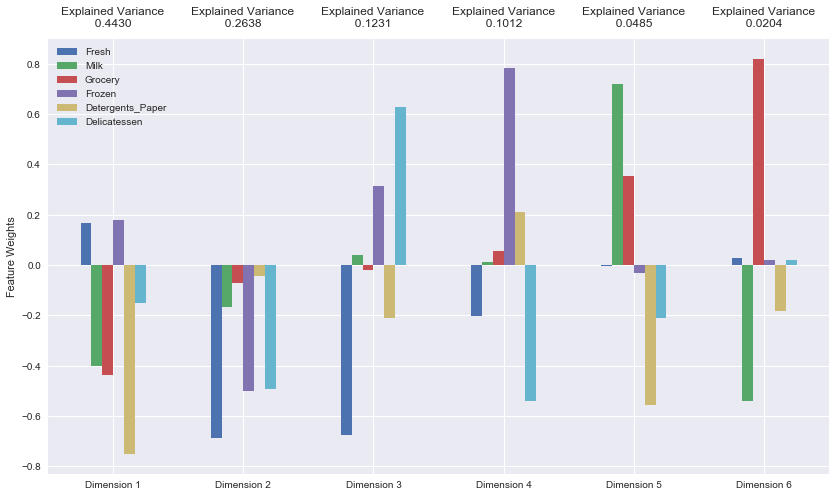

In [13]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=6).fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

In [14]:
pca_results['Explained Variance'].cumsum()

Dimension 1    0.4430
Dimension 2    0.7068
Dimension 3    0.8299
Dimension 4    0.9311
Dimension 5    0.9796
Dimension 6    1.0000
Name: Explained Variance, dtype: float64

In [15]:
pca_results

Explained Variance   Fresh    Milk  Grocery  Frozen  \
Dimension 1              0.4430  0.1675 -0.4014  -0.4381  0.1782   
Dimension 2              0.2638 -0.6859 -0.1672  -0.0707 -0.5005   
Dimension 3              0.1231 -0.6774  0.0402  -0.0195  0.3150   
Dimension 4              0.1012 -0.2043  0.0128   0.0557  0.7854   
Dimension 5              0.0485 -0.0026  0.7192   0.3554 -0.0331   
Dimension 6              0.0204  0.0292 -0.5402   0.8205  0.0205   

             Detergents_Paper  Delicatessen  
Dimension 1           -0.7514       -0.1499  
Dimension 2           -0.0424       -0.4941  
Dimension 3           -0.2117        0.6286  
Dimension 4            0.2096       -0.5423  
Dimension 5           -0.5582       -0.2092  
Dimension 6           -0.1824        0.0197

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**
<br>
The total variance explained in the 1st and 2nd principal components is 70.7%. For the first 4 principal components the total variance is 93.1%.
<br><br>
https://discussions.udacity.com/t/customer-segments-q5-pca-implementation/371960/6 <br>
https://onlinecourses.science.psu.edu/stat505/node/54<br>
Six dimensions have been printed, and each of them explains the variance in a certain percentage of the data. The dimension 1 (D1) explains the 44.3% of the variance. It is strongly correlated with Detergents_Paper, Grocery and Milk. this suggest that D1 increase if these 3 features increase as well. Nevertheless D1 correlates more strong with Detergents_Paper (|0.7514|).
<br>
The D2 will increase if Fresh, frozen and Delicatessen will decrease together. It is possible to states that a customer buying a high volume of Fresh, Frozen and Delicatessen might no have big spends in the other 3 features. Grocery, Detergents_Paper and Milk.
<br>
The D3 will increase when Fresh will decrease and Frozen and Delicatessen will increase.
<br>
The D4 will increase if frozen increase and delicatessen and fresh decrease. This corelation might explain a frozen supermarket.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [16]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  \
0      -0.1419      -2.7722       0.3293       0.3928      -1.3904   
1      -0.9434       3.8210      -2.7013       2.8132       3.0338   
2       0.7390       3.6914      -2.0335      -0.9927       0.3109   

   Dimension 6  
0       0.2012  
1       0.4677  
2      -0.1734

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [17]:
good_data.head() #checking...

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0   9.446913  9.175335  8.930759  5.365976          7.891331      7.198931
1   8.861775  9.191158  9.166179  7.474205          8.099554      7.482119
2   8.756682  9.083416  8.946896  7.785305          8.165079      8.967504
3   9.492884  7.086738  8.347827  8.764678          6.228511      7.488853
4  10.026369  8.596004  8.881558  8.272571          7.482682      8.553525

In [19]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.fit_transform(good_data)

print("good_data transformed using the PCA with 2 dimensions.")
print(reduced_data[0])

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

good_data transformed using the PCA with 2 dimensions.
[-1.7579834   0.00971115]


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [20]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

Dimension 1  Dimension 2
0      -0.1419      -2.7722
1      -0.9434       3.8210
2       0.7390       3.6914

## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

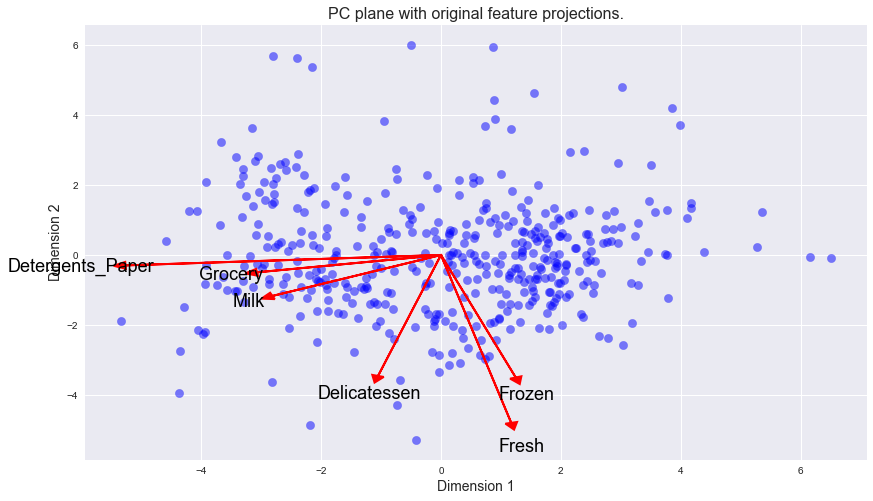

In [21]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**
<br>
**K-means** cluster algorithm, it is easy to understand and it is very fast. nevertheless is highly sensitive to outliers. I will recommend this algorithms in the case the data is well separated.
<br><br>
**Gaussian Mixture Model (GMM)** cluster algorithm use 2 parameters: The mean and the standard desviation to calculate the clusters. Therefore GMM clusters can take any kind of elliptical shape, because the standard desviation is in both X and Y direction. Each gaussian distribution is assigned to single cluster and some points might belong to different clusters at different probability (soft assignment).
<br><br>
from the biplot we can extract two main observations. First the data does not describe clearly any cluster or group of points, meaning that some points might be overlaped in different groups. the second observation is that there exist strong correlations between Detergents_Paper, Grocery and Milk in one area and Fresh - Frozen in other area. So this groups might being overlaped. we conclude that **Gaussian Mixture Model (GMM)** will produce the results.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [22]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn import mixture
from sklearn.metrics import silhouette_score

nCluster = 2

for i in range (0, 6):
    clusterer = mixture.GaussianMixture(n_components=nCluster, random_state=1).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)
    
    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    print("Cluster_%d" % (nCluster) +" silhouette score: " +str(score))
        
    nCluster += 1

Cluster_2 silhouette score: 0.42191684646261496
Cluster_3 silhouette score: 0.36608316580577893
Cluster_4 silhouette score: 0.2894015790851912
Cluster_5 silhouette score: 0.3340546325086401
Cluster_6 silhouette score: 0.29889033611514676
Cluster_7 silhouette score: 0.3241770236290148


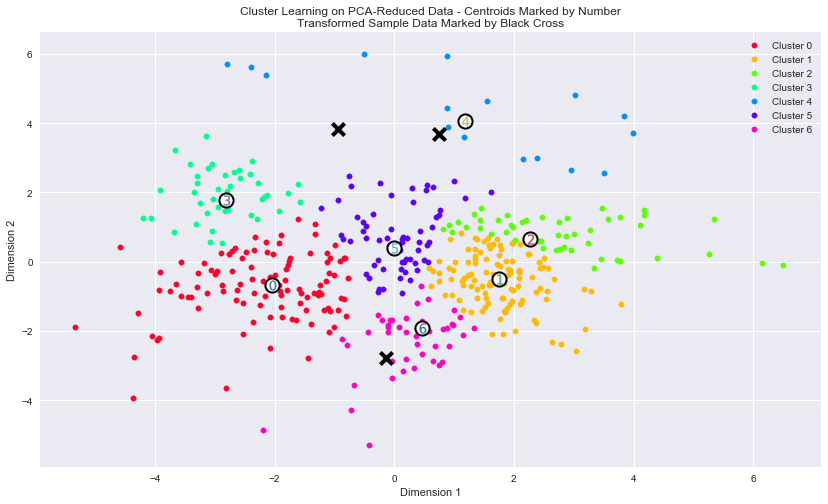

In [23]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**
<br>
Cluster_2 silhouette score: 0.42191684646261496 <br>
Cluster_3 silhouette score: 0.36608316580577893 <br>
Cluster_4 silhouette score: 0.2894015790851912 <br>
Cluster_5 silhouette score: 0.3340546325086401 <br>
Cluster_6 silhouette score: 0.29889033611514676 <br>
Cluster_7 silhouette score: 0.3241770236290148

In [24]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn import mixture
from sklearn.metrics import silhouette_score

nCluster = 2

clusterer = mixture.GaussianMixture(n_components=nCluster, random_state=1).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)
    
# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)
print("Cluster_%d" % (nCluster) +" silhouette score: " +str(score))
    

Cluster_2 silhouette score: 0.42191684646261496


### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

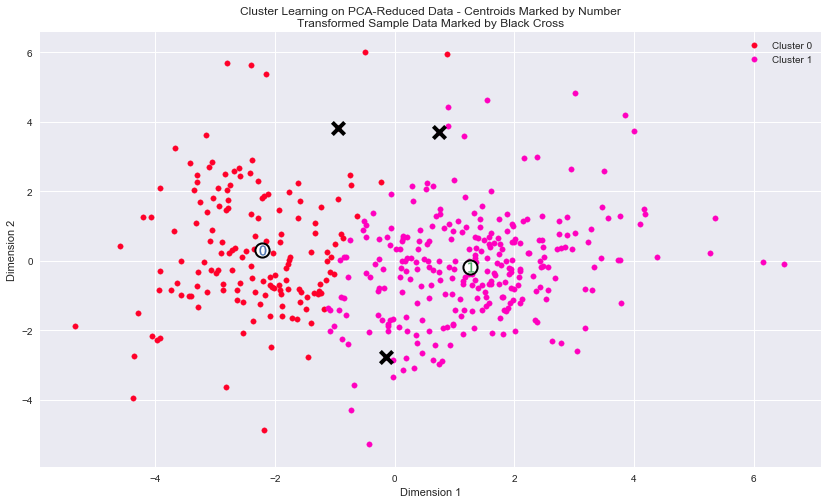

In [25]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [26]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers =np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0  3552.0  7837.0  12219.0   870.0            4696.0         962.0
Segment 1  8953.0  2114.0   2765.0  2075.0             353.0         732.0

### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

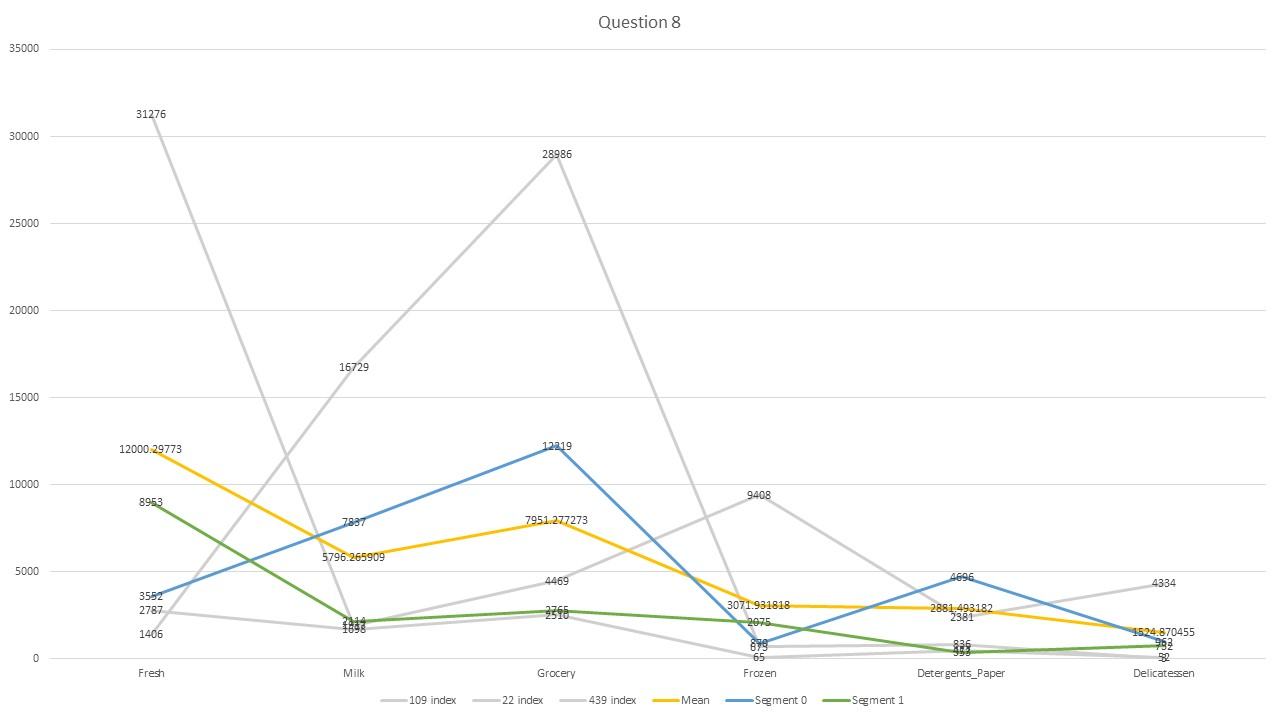

**Answer:**
<br>
**Segment 0** (Blue curve) It is similar to sample 109, but with a smaller grocery purchaise. The "Fresh" and "Frozen" Categories are below than the mean (yellow curve) values. In the other hand "Milk", "Grocery" and "Detergents_Paper" are higher than the mean of associated categories. Delicatessen is just below than the mean. The segment 0 it is clearly in the left side in the Cluster Graphic. Segment 0 could be discribed as a local supermarket.
<br><br>
**Segment 1** (Green curve) Shows values below than mean in each category. "Fresh", "Frozen" and "Delicatessen" are the closest categories to the correspond means (yellow curve). Segment 1 is in the right side in the Cluster Graphic. Since "Delicatessen" has the smallest distance to the correspond mean, Segment 1 could be could expose a small value in dimension 1. It could be a local fresh food market/convenience store.

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [27]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


**Answer:**
<br>
**Point 0 (sample 22)** The prediction is correct, because it was discribed in question 1: *Fresh, Frozen and Delicatessen categories have the higher spending amount, which indicates this costumer demands high quality, and selective products. The combination of these categories suggest a Fresh food Market.* It is also aligned with Segment 1 center. In general terms a customer who consume Fresh, Frozen and Delicatessen products. clearly represents segment 1.
<br><br>
**Point 1 (sample 109)** This prediction is also correct. It was described: *The categories Grocery and Milk are both much higher than mean spending amount. The rest of the categories are below than mean spending amount.* It is possible to state safely this description belongs to the left side of the graphic or classified in Cluster 0. Clearly represents segment 0.
<br><br>
**Point 2 (sample 439)** This prediction could be considered correct. description in question 1: *The spending amount in Fresh, Milk and Grocery categories is similar. Then in the other 3 categories is quite small. Also is necessary consider that each category performs below than the mean curve. An interesting point is this curve imitates the mean curve, but with small values.* The description points a common shop, most probably a local supermarket. clearly close to Segment 1 and classified in Cluster 1.
<br><br>
All sample points predicted are consistent with the cluster predicted.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**
<br>
The A/B test needs to be applyied to both clusters, it is recommended start with the 5% of costumer base and then ramp up to 25% if the customers interact with the web banner. It is also recommended leave the algorithm for 1-2 weeks, because the customers might react with web banner as a new "feature". So they will feel more attracted. We also recommend a chatbot to clarify customers questions, measure the impact of the new service proposal and harvest new information, which might help later on.
<br><br>
Customers classified in cluster 0 will be probably less affected by 3 days delivery service. This type of costumer consume Grocery - Milk and Detergents_Paper above mean. These products usually do not required refrigerated compartments to preserve the food or a short period of consume time, like fruits. Therefore it is more likely the customers classified in this cluster might react positively to 3 days week delivery serivice. In the other hand, some these customers might react negatively, due to the need to consider an extra space for storage. Since the delivery is not daily.
<br>
Customers classified in cluster 0, Will be affected by 3 days deivery service. Because fresh products are not delivery every day, and it will increase the food waste (Vegetables, Fish, Fruits).

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**
It is possible to use a supervised model (ADA Boost, SVM, etc) to train the original data and use cluster segments as a target label. For new customers it is possible  to predict the best service delivery 3 or 5 days. Using Supervised model we could also predict customers buying habits, based on the cluster the customer belongs.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

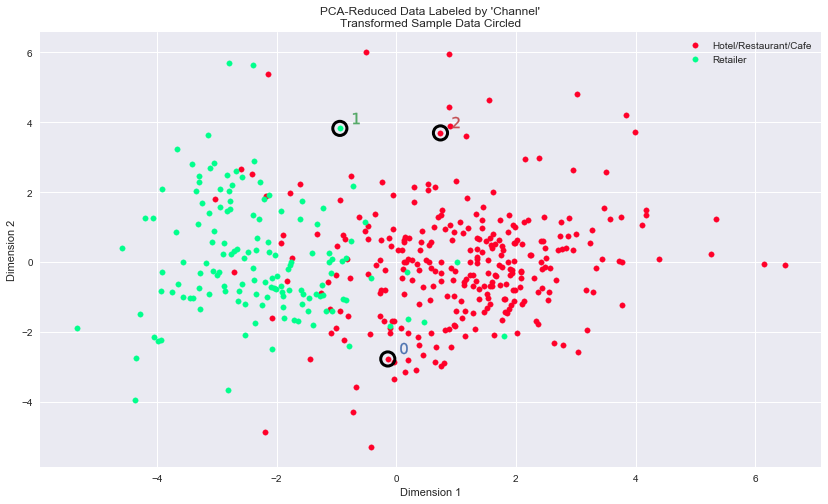

In [28]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**
<br>
For sample 0 (22) it could be classified as a Hotel/Restorant/Cafe. the original description says: *"Fresh, Frozen and Delicatessen categories have the higher spending amount, which indicates this costumer demands high quality, and selective products. Detergents_Paper category is just below the average, might indicate to be cleaned constantly..."* The original assumption was Fresh food Market, as a restorant could also classify.
<br><br>
For sample 1 (109) *"categories Grocery and Milk are both much higher than mean spending amount. The rest of the categories are below than mean spending amount... This sample could represent a large supermarket.* It also fits with the classification.
<br><br>
For sample 2 (439): *"The spending amount in Fresh, Milk and Grocery categories is similar. ...These observations might point to a small local supermarket/convenience store...* it also could be correct.
<br>
Yes, in the extremely left for retail and in the extremely right for Hotels/Restarants/Cafes
These results confirm the observation of question 8.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.